In [2]:
import pandas as pd
import pickle
import numpy as np 
import os
import networkx as nx
import matplotlib.pyplot as plt
import gzip
from scipy import stats

# Import Data 

In [9]:
# Ugandan Village Dataset
# Within organisation social networks
ugandan_village_dict = dict()
for i in os.listdir('./data/Uganda Network Edgelists 2013/friendship'):
    if 'txt' in i:
        x = pd.read_csv('./data/Uganda Network Edgelists 2013/friendship/' + str(i), header = None)
        ugandan_village_dict['Ugandan Village '+ str(i)] = x

In [10]:
# Comfitnet Social Networks
list_of_relevant_social_networks = ['Dolphin_social_network_Dolphins',
                                    'Email_network_Uni_R-V_Spain_Email_network_Uni_R-V_Spain',
                                    'Family_planning_in_Korea1',
                                    'Family_planning_in_Korea2',
                                    'High_school_dynamic_contact_networks_contact_list,_2011',
                                    'High_school_dynamic_contact_networks_contact_list,_2012',
                                    'Hollywood_film_music_Hollywood_film_music',
                                    'Kapferer_tailor_shop_Kapferer_tailor_shop_1',
                                    'Kapferer_tailor_shop_Kapferer_tailor_shop_2',
                                    'Les_Miserables_coappearances_Les_Miserables',
                                    'NCAA_college_football_2000_American_College_Football',
                                    'Norwegian_Board_of_Directors_net1mode_2011-08-01',
                                    'Zachary_Karate_Club_Zachary_karate_club_77',
                                    'Zachary_Karate_Club_Zachary_karate_club_78']

pickle_in = open('./data/Comfitnet/CommunityFitNet.pickle', "rb")
comfitdata = pickle.load(pickle_in, encoding ='latin1')

comfitdata_social = comfitdata[comfitdata['network_name'].isin(list_of_relevant_social_networks)]
comfitnet_social_subset = comfitdata_social[['network_name','nodes_id', 'edges_id']].reset_index(drop=True)

comfit_dict = dict()

for i in range(0,len(comfitnet_social_subset)):
    network_name = comfitnet_social_subset.network_name[i]
    edgelist = pd.DataFrame(comfitnet_social_subset.edges_id[i])
    comfit_dict[network_name] = edgelist



In [11]:
# Facebook
facebook = pd.read_csv('./data/Facebook/facebook-links.txt', sep='\t', header = None)
fb_with_timestamp = facebook.dropna().reset_index(drop=True)

In [12]:
from datetime  import datetime

def datestr_to_datetime(x):
    return datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S')

# where dates is some list of dates as a string... 
# vectorize the function
converttime = np.vectorize(datestr_to_datetime)

In [13]:
# Flixter
flixter_edges = pd.read_csv('./data/Flixter/flixter_edges.csv', header = None )

In [14]:
# Sociology Students
socistudent_matrix = pd.read_table('./data/Sociology Students of Groningen/stu98t6.txt', sep='\t', header = None).drop(0, axis =1)
socistudent_matrix = socistudent_matrix.replace(6, 0)
socistudent_matrix = socistudent_matrix.replace(5, 0)
socistudent_matrix = socistudent_matrix.replace(8, 0)
socistudent_matrix = np.matrix(socistudent_matrix)

In [15]:
# Linux Mailing List 
linux = pd.read_csv('./data/Linux Kernel Mailing List/out.lkml_person-thread_person-thread.txt', delim_whitespace = True, header = None)
linux.head()

,0,1,2,3
0,1,1,1,1139316299
1,1,1,1,1139316058
2,2,1,1,1139261931
3,3,1,1,1139256458
4,4,1,1,1139238713


In [16]:
# Within organisation social networks
within_organisation_dict = dict()
for i in os.listdir('./data/Within-Org_FBFriendships'):
    if 'csv' in i:
        print(i)
        x = pd.read_csv('./data/Within-Org_FBFriendships/' + str(i), header = None)
        within_organisation_dict[str(i)] = x
        print(str(type(within_organisation_dict)))

M2Anonymized.csv
<class 'dict'>
L1Anonymized.csv
<class 'dict'>
M1Anonymized.csv
<class 'dict'>
L2Anonymized.csv
<class 'dict'>
S2Anonymized.csv
<class 'dict'>
S1Anonymized.csv
<class 'dict'>


In [70]:
# radoslaw email

radoslaw = pd.read_csv('./data/radoslaw_email/out.radoslaw_email_email.txt', delim_whitespace = True, header = None)
radoslaw.head()

,0,1,2,3
0,1,2,1,1262454010
1,1,3,1,1262454010
2,1,4,1,1262454010
3,1,5,1,1262454010
4,1,6,1,1262454010


In [71]:
# MIT contact network

mit = pd.read_csv('./data/mit/out.mit.txt', delim_whitespace = True, header = None)
mit.head()

,0,1,2,3
0,1,2,1,1095183096
1,3,4,1,1095183096
2,5,6,1,1095183096
3,7,8,1,1095183096
4,9,2,1,1095183096


In [72]:
haggle_contact = pd.read_csv('./data/haggle_contact/out.contact.txt', delim_whitespace = True, header = None)
haggle_contact.head()

,0,1,2,3
0,1,2,1,21574
1,1,3,1,21578
2,1,4,1,21687
3,1,5,1,21574
4,1,6,1,21796


In [128]:
#high school contacts 

high_school_contacts_2011 = pd.read_csv('./data/Contact Patterns - High School/highschool_2011.csv', sep = '\t', header = None)

high_school_contacts_2012 = pd.read_csv('./data/Contact Patterns - High School/highschool_2012.csv', sep = '\t', header = None)


In [117]:
#Create dictionaries
dict_of_networks = dict({'Flixter': flixter_edges.sample(n=10000), 
                      'Facebook': fb_with_timestamp.iloc[:,0:2],
                      'Linux Kernel Mailing List': linux.iloc[:,0:2],
                      'Dictionary of Within Org Friendships Network': within_organisation_dict,
                      'Dictionary of Comfit Networks': comfit_dict,
                      'Sociology Students of Groningen': socistudent_matrix,
                         'Dictionary of Ugandan Villages': ugandan_village_dict,
                         'Radoslaw Email Network': radoslaw.iloc[:,0:2],
                         'MIT Contact Network': mit.iloc[:,0:2],
                         'Haggle Contact Network': haggle_contact.iloc[:, 0:2],
                         'High School 2011': high_school_contacts_2011.iloc[:, 1:3].T.reset_index(drop=True).T,
                         'High School 2012': high_school_contacts_2012.iloc[:, 1:3].T.reset_index(drop=True).T
          })

## 1. Plot Distributions

In [118]:
def plot_distributions_calculate_LLR(graph,network_name):
    import powerlaw
    import numpy as np
    graph_degree = np.array(sorted([deg for id, deg in graph.degree()]))
    results = powerlaw.Fit(graph_degree, xmin = np.min(graph_degree))
    alpha = results.power_law.alpha
    fig1, ax1 = plt.subplots()
    results.plot_ccdf(color = 'b', linewidth = 2, label = str('CDF'), ax = ax1) 
    results.power_law.plot_ccdf(color = 'r', linestyle = '--', ax = ax1, label = str('Power Law Approx'))
    results.exponential.plot_ccdf(color = 'b', linestyle = ':', ax = ax1, label = str('Exponential Distr  Approx'))
    results.lognormal.plot_ccdf(color = 'k', linestyle = '-.', ax = ax1, label = str('Lognormal Distr  Approx'))
    comparison_results = results.distribution_compare('power_law', 'exponential')
    plt.title(network_name +' \n LLR = ' + str(int(comparison_results[0])) + '  P-Val = ' + str(round(comparison_results[1], 4)))
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('Log Degree')
    plt.ylabel('Log Complementary CDF')
    fig1.savefig('./images/'+str(network_name)+'.png', bbox_inches='tight')
    
    if comparison_results[0] > 0:
        closer_theoretical_distribution = 'Power Law'
    else:
        closer_theoretical_distribution = 'Exponential'
    
    return closer_theoretical_distribution, comparison_results[1]
    

In [119]:
def plot_graphs(dict_of_networks):
    network_to_theoretical_dict = dict()
    p_val_dict = dict()
    nodes = dict()
    edges = dict()
    
    for network_name, network_data in dict_of_networks.items():
       # Case when the value of the dictionary item is a pandas edgelist
        if isinstance(network_data, pd.DataFrame):
#             print('Plotting Graph for ' + str(network_name))
            graph = nx.from_pandas_edgelist(network_data, 0, 1)
            theoretical_dist, p_val = plot_distributions_calculate_LLR(graph,network_name)
            network_to_theoretical_dict[network_name] = theoretical_dist
            p_val_dict[network_name] = p_val
            nodes[network_name] = len(graph.nodes)
            edges[network_name] = len(graph.edges)


            
            
        
        # Case when the value of the dictionary item is a numpy matrix
        elif isinstance(network_data, np.matrix):
#             print('Plotting Graph for ' + str(network_name))
            graph = nx.from_numpy_matrix(network_data)
            theoretical_dist, p_val = plot_distributions_calculate_LLR(graph,network_name)
            network_to_theoretical_dict[network_name] = theoretical_dist
            p_val_dict[network_name] = p_val
            nodes[network_name] = len(graph.nodes)
            edges[network_name] = len(graph.edges)



        # Case when the value of the dictionary item is already a networkxGraph
        elif isinstance(network_data, nx.Graph):
            theoretical_dist, p_val = plot_distributions_calculate_LLR(graph,network_name)
            network_to_theoretical_dict[network_name] = theoretical_dist
            p_val_dict[network_name] = p_val
            nodes[network_name] = len(graph.nodes)
            edges[network_name] = len(graph.edges)



            
        # Case when the value of the dictionary item is a dictionary of pandas edgelist
        elif isinstance(network_data, dict):
            for sub_network_name, edgelist in network_data.items():
#                 print('Plotting Graph for ' + str(sub_network_name))
                graph = nx.from_pandas_edgelist(edgelist, 0, 1)
                theoretical_dist, p_val = plot_distributions_calculate_LLR(graph, sub_network_name)
                network_to_theoretical_dict[sub_network_name] = theoretical_dist
                p_val_dict[sub_network_name] = p_val
                nodes[sub_network_name] = len(graph.nodes)
                edges[sub_network_name] = len(graph.edges)
                
    p_val_df = pd.DataFrame.from_dict(p_val_dict, orient = 'index', columns = ['P_Val'])
    network_to_theoretical  = pd.DataFrame.from_dict(network_to_theoretical_dict, orient = 'index', columns = ['Closer To'])
    nodes_df = pd.DataFrame.from_dict(nodes, orient = 'index', columns = ['n_nodes'])
    edges_df = pd.DataFrame.from_dict(edges, orient = 'index', columns = ['n_edges'])
    
    

    return(network_to_theoretical.join([p_val_df,nodes_df,edges_df]))


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/powerlaw.py:1605: RuntimeWarning: invalid value encountered in true_divide
  CDF = CDF/norm
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
/Library/F

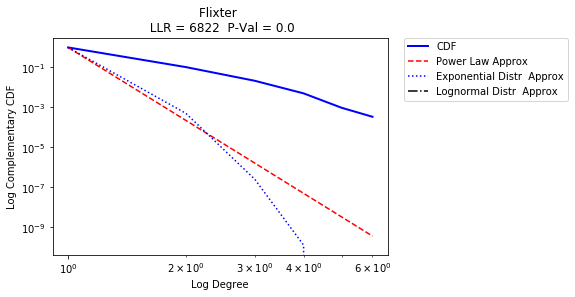

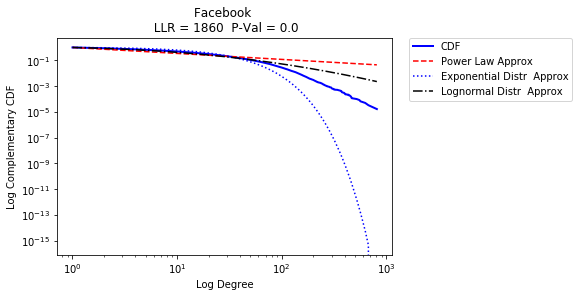

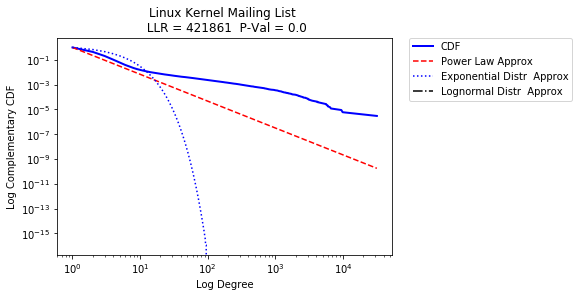

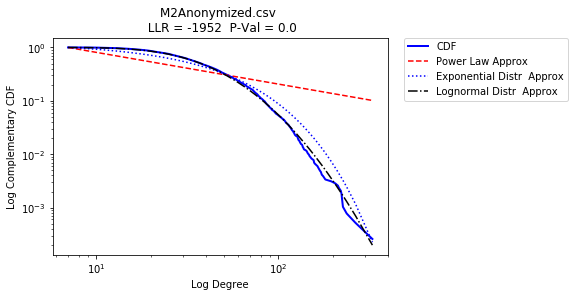

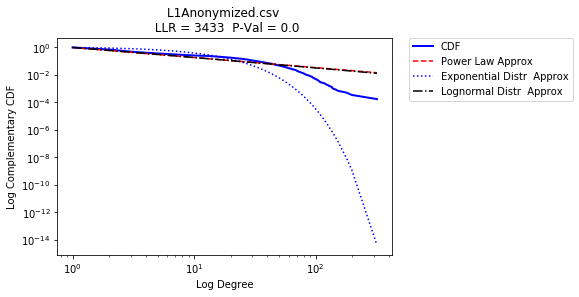

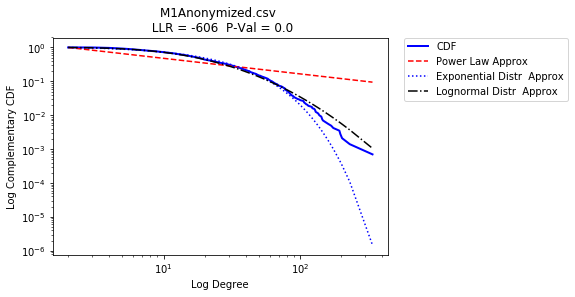

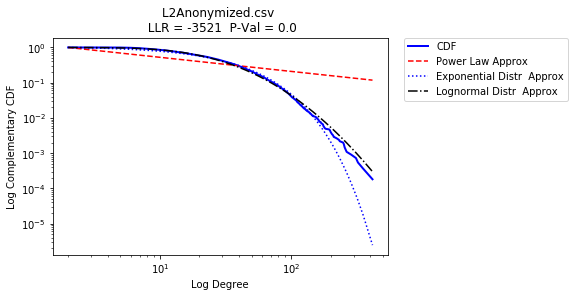

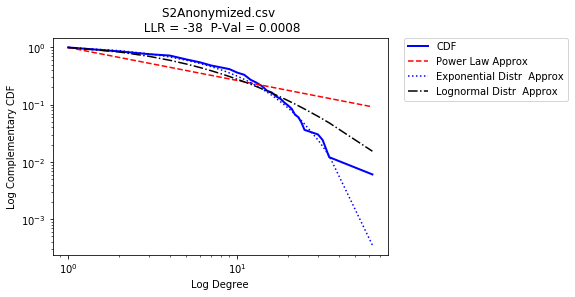

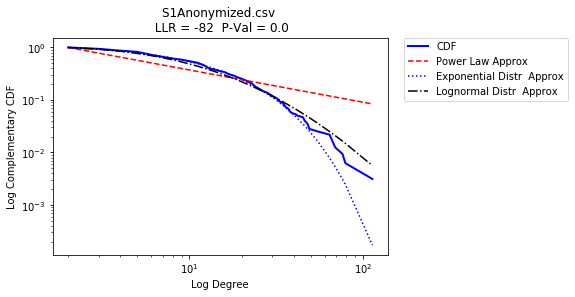

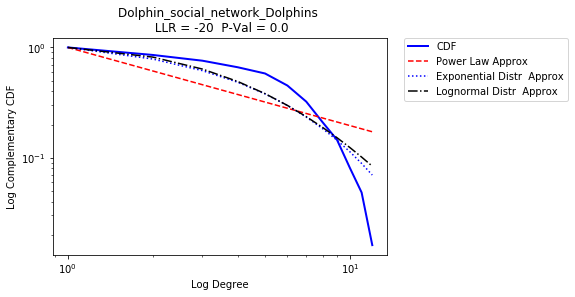

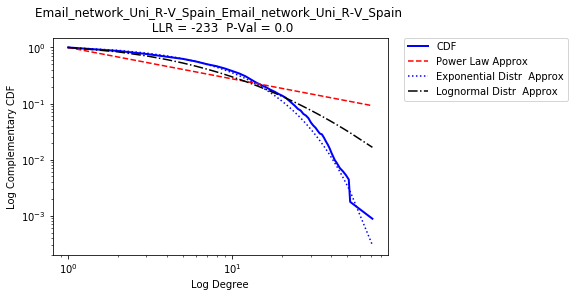

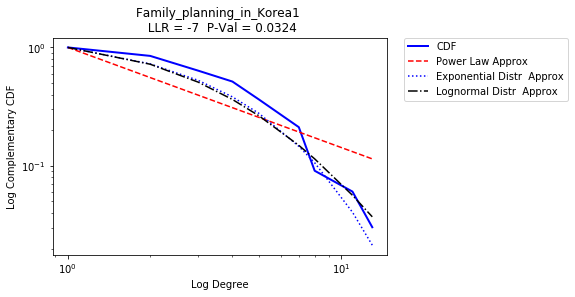

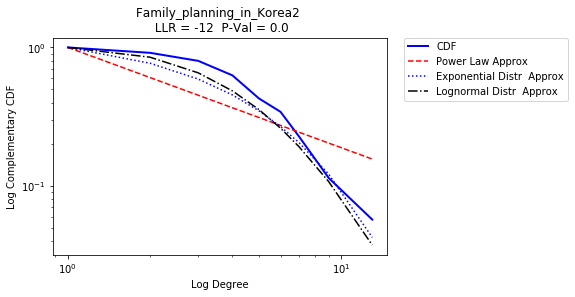

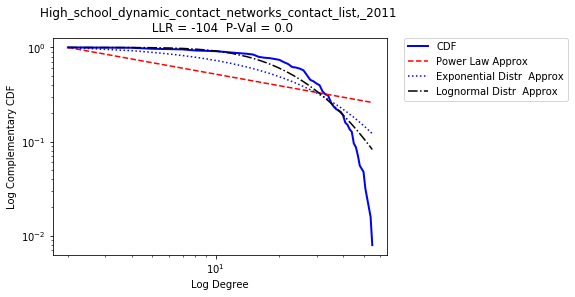

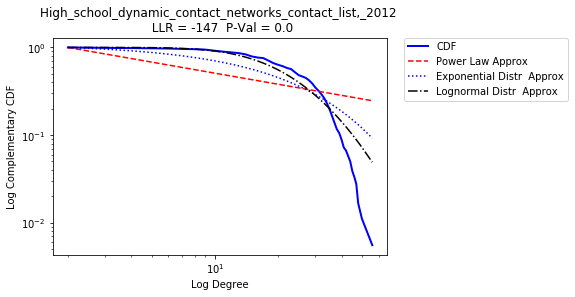

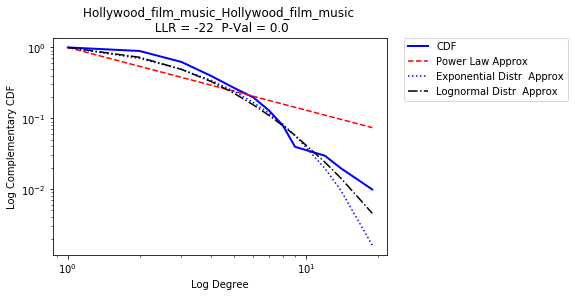

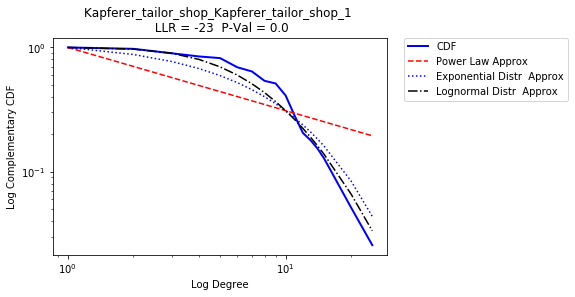

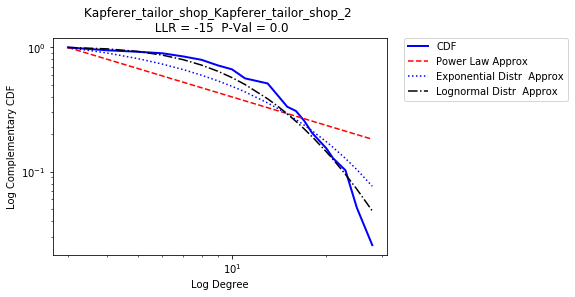

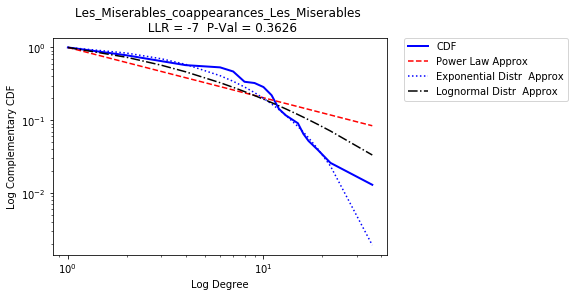

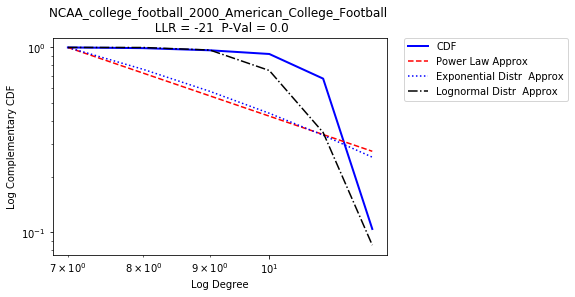

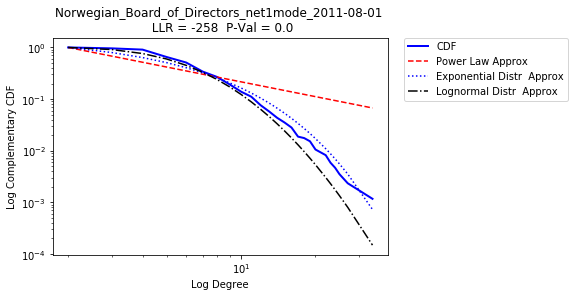

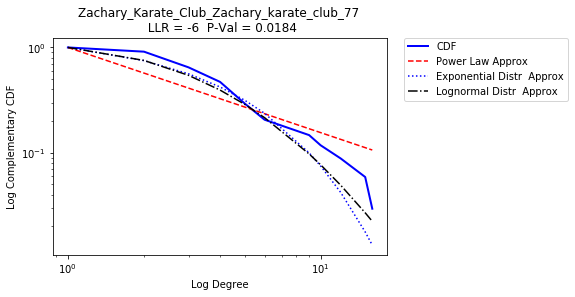

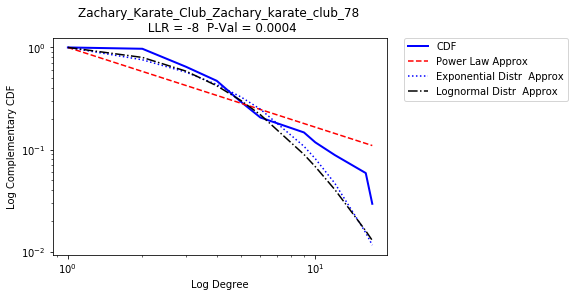

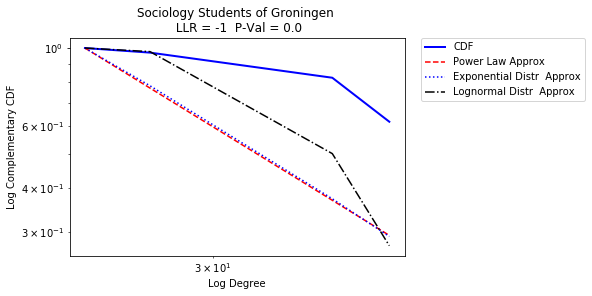

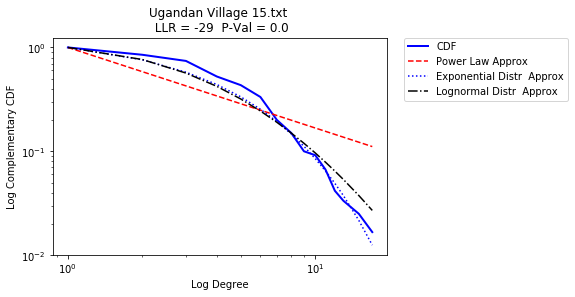

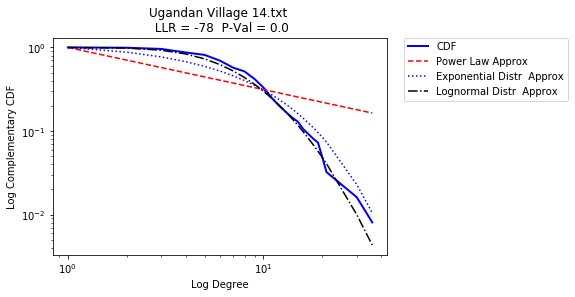

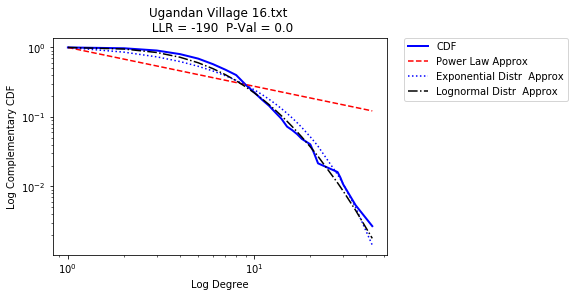

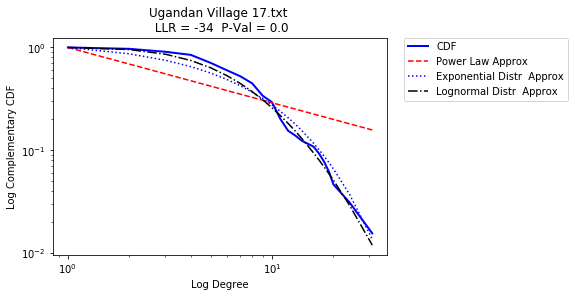

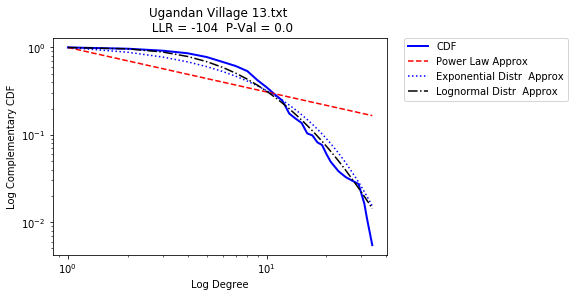

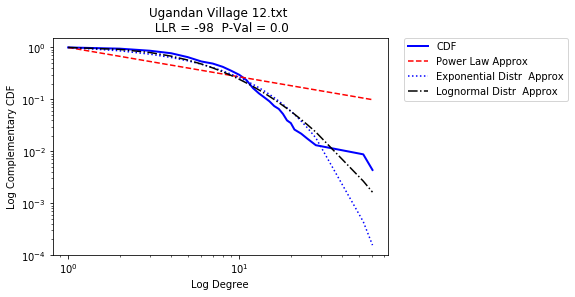

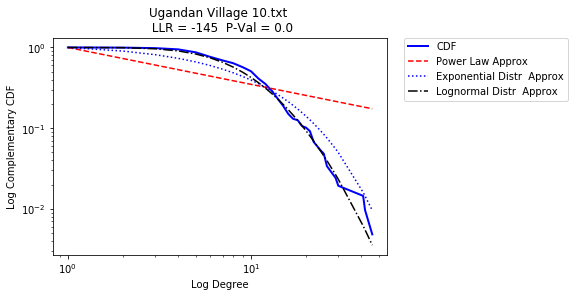

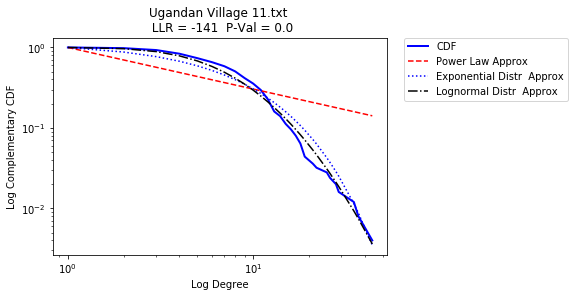

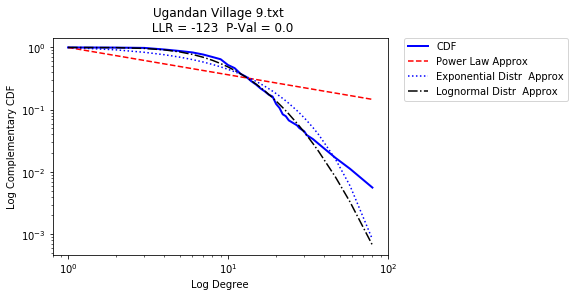

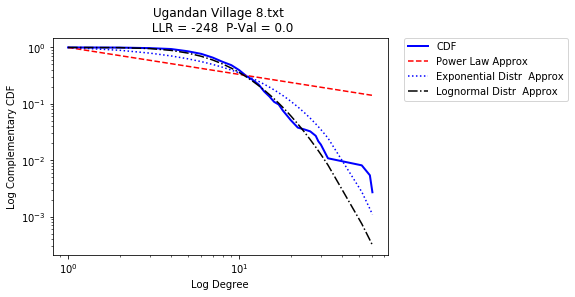

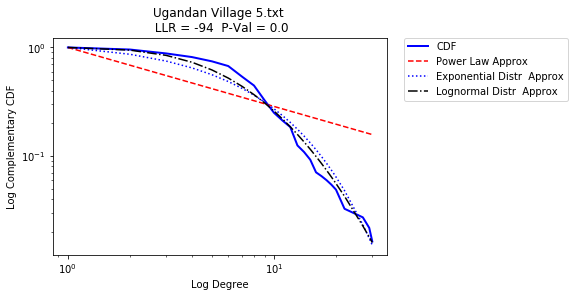

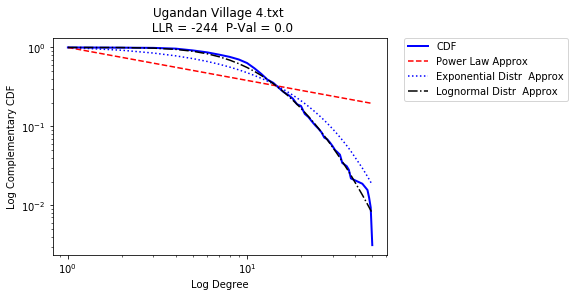

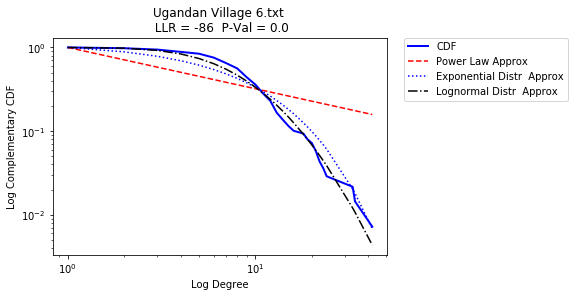

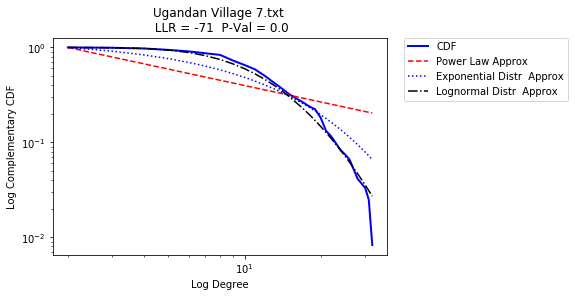

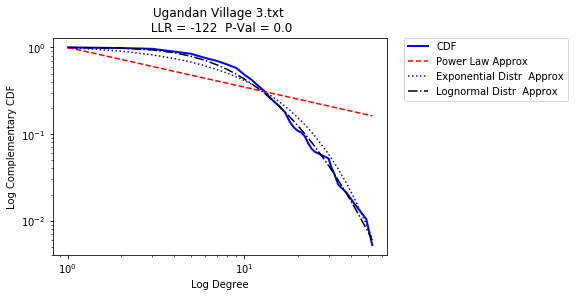

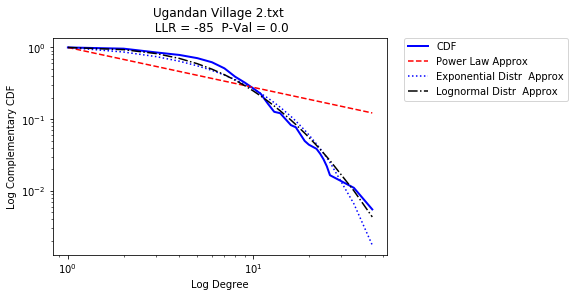

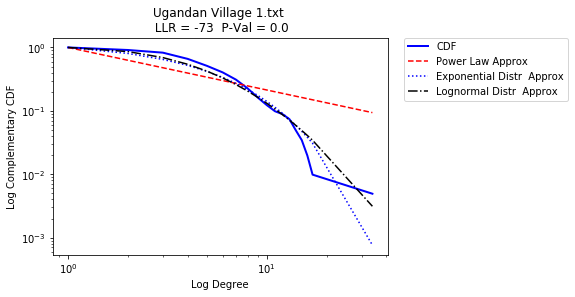

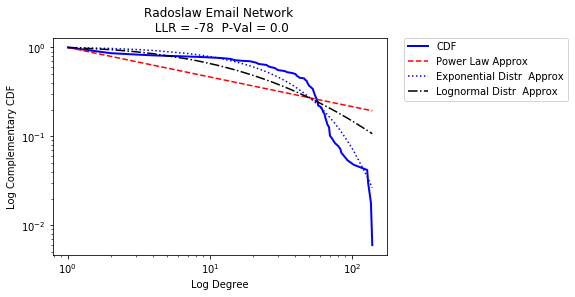

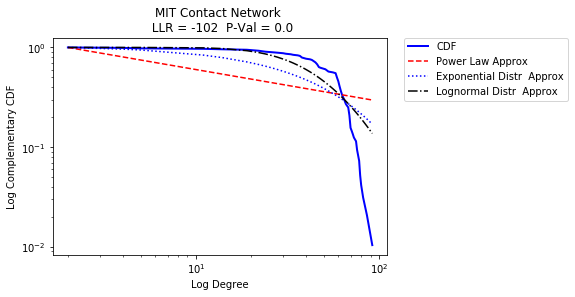

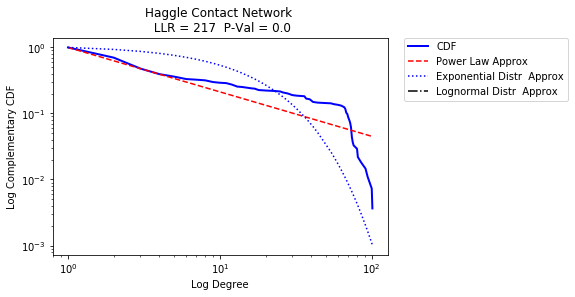

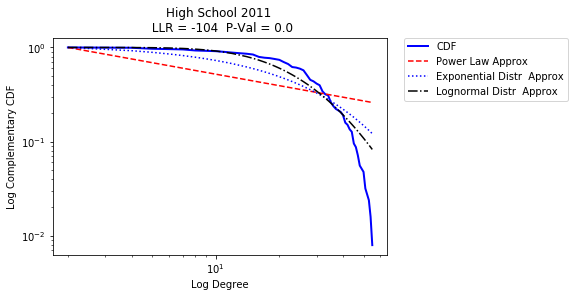

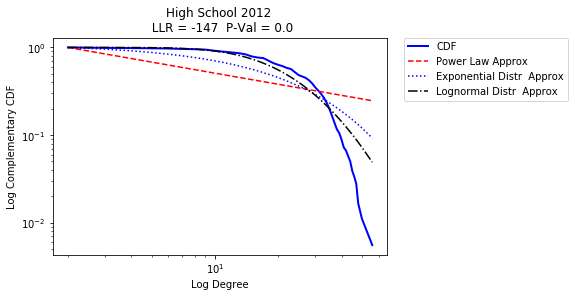

In [120]:
combined_df = plot_graphs(dict_of_networks)

## 2. KS Test Statistic (Computed based on Fitted Distribution + Empirical Data, No generation of synthetic Alpha)

In [121]:
def ks_distance(graph):
    graph_degree = np.array(sorted([deg for id, deg in graph.degree()]))
    power_law_fit = powerlaw.Fit(graph_degree, xmin = np.min(graph_degree))
    return power_law_fit.power_law.D

def calc_ks_test_statistic(dict_of_networks):
    ks_distance_dict = dict()
    for network_name, network_data in dict_of_networks.items():
        if isinstance(network_data, pd.DataFrame):
            graph = nx.from_pandas_edgelist(network_data, 0, 1)
            ks_distance_dict[network_name] = ks_distance(graph)
            

            # Case when the value of the dictionary item is a numpy matrix
        elif isinstance(network_data, np.matrix):
            graph = nx.from_numpy_matrix(network_data)
            ks_distance_dict[network_name] = ks_distance(graph)
            # Case when the value of the dictionary item is already a networkxGraph
        elif isinstance(network_data, nx.Graph):
            ks_distance_dict[network_name] = ks_distance(graph)
                    # Case when the value of the dictionary item is a dictionary of pandas edgelist
        elif isinstance(network_data, dict):
            for sub_network_name, edgelist in network_data.items():
                graph = nx.from_pandas_edgelist(edgelist, 0, 1)
                ks_distance_dict[sub_network_name] = ks_distance(graph)

                
    
    return(pd.DataFrame.from_dict(ks_distance_dict, orient = 'index', columns = ['ks_test']))
        

In [122]:
import powerlaw
ks_distance_df = calc_ks_test_statistic(dict_of_networks)

# 4. Combine Analysis

In [123]:
combined = combined_df.join(ks_distance_df)

In [124]:
combined['edge/noderatio'] = combined['n_edges'] / combined['n_nodes']

In [125]:
combined.sort_values('Closer To', ascending= False )

,Closer To,P_Val,n_nodes,n_edges,ks_test,edge/noderatio
Flixter,Power Law,0.000000e+00,17672,10000,0.103670,0.565867
L1Anonymized.csv,Power Law,1.107721e-262,5793,30753,0.100219,5.308648
Haggle Contact Network,Power Law,9.977692e-26,274,2124,0.100676,7.751825
Facebook,Power Law,7.296178e-09,61096,614797,0.187344,10.062803
Linux Kernel Mailing List,Power Law,2.047162e-131,337509,599857,0.211744,1.777307
High School 2011,Exponential,7.202541e-98,126,1710,0.403581,13.571429
Ugandan Village 16.txt,Exponential,4.132288e-88,372,1379,0.362021,3.706989
Ugandan Village 17.txt,Exponential,8.143095e-18,65,259,0.372766,3.984615
Ugandan Village 13.txt,Exponential,6.912356e-49,183,814,0.364560,4.448087
Ugandan Village 12.txt,Exponential,3.989932e-22,229,885,0.327508,3.864629


In [126]:
import seaborn as sns

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


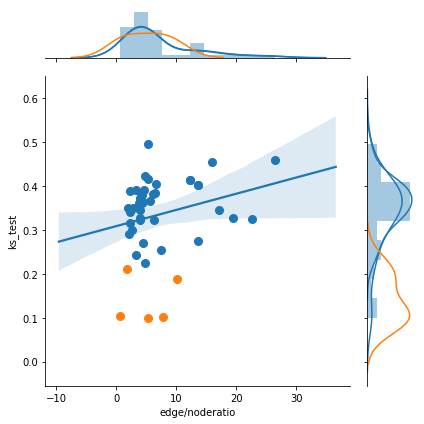

In [127]:
g = sns.jointplot(x='edge/noderatio', y= 'ks_test', kind = 'reg', scatter = False, data = combined)
for i, subdata in combined.groupby('Closer To'):
    sns.kdeplot(subdata.loc[:,'edge/noderatio'], ax=g.ax_marg_x, legend=False)
    sns.kdeplot(subdata.loc[:,'ks_test'], ax=g.ax_marg_y, vertical=True, legend=False)
    g.ax_joint.plot(subdata.loc[:,'edge/noderatio'], subdata.loc[:,'ks_test'], "o", ms = 8)
plt.tight_layout()
plt.show()

# 5. Test Case Area

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


('Power Law', 1.1077206451758477e-262)

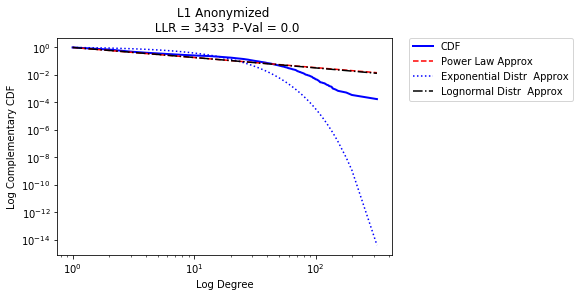

In [7]:
plot_distributions_calculate_LLR(nx.from_pandas_edgelist(dict_of_networks['High School 2011.csv'], 1, 2)
                                 , 'L1 Anonymized')